## **Case Study 03 - Artificial Neural Network**



In [39]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#reading the data
data=pd.read_csv('/content/mobile_price_classification (1).csv')

In [41]:
#First 5 observation
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [42]:
#dimension of dataset
data.shape

(2000, 21)

In [43]:
#basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [44]:
#statistical features of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
bluetooth,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
front_cam,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
4G,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [45]:
#checking missing values
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [46]:
#defining features and labels
X=data.drop(['price_range'],axis=1).values
y=data['price_range'].values

In [47]:
#reshaping the target
y = y.reshape(-1,1)

In [48]:
#onehot encoding of target
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
y = one.fit_transform(y)
y = y.toarray()

In [49]:
#scaling the feature values using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [50]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [51]:
#importing functions for buliding neural network
from keras.models import Sequential
from keras.layers import Dense

In [52]:
#building the neural network
model=Sequential()
model.add(Dense(22,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [53]:
#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
#fitting the model
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
38/38 [==============================] - 1s 7ms/step - loss: 1.6376 - accuracy: 0.2408 - val_loss: 1.5807 - val_accuracy: 0.2433
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 1.4876 - accuracy: 0.2950 - val_loss: 1.4399 - val_accuracy: 0.3133
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 1.3711 - accuracy: 0.3650 - val_loss: 1.3298 - val_accuracy: 0.3833
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 1.2737 - accuracy: 0.4292 - val_loss: 1.2411 - val_accuracy: 0.4433
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 1.1883 - accuracy: 0.4850 - val_loss: 1.1581 - val_accuracy: 0.5033
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 1.1117 - accuracy: 0.5492 - val_loss: 1.0859 - val_accuracy: 0.5633
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 1.0404 - accuracy: 0.5825 - val_loss: 1.0262 - val_accuracy: 0.5833
Epoch 8/100
3

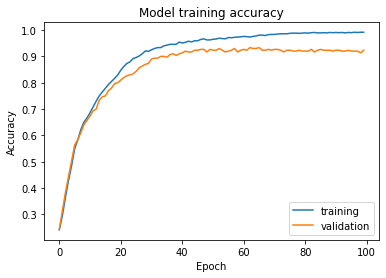

In [64]:
#plotting Model accuracy v/s Epoch
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

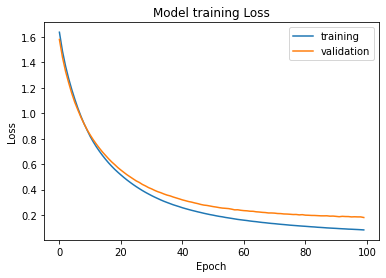

In [65]:
#plotting Model Loss v/s Epoch
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [57]:
#prediction of test values
y_pred=model.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [58]:
#we have encoded the labels.

#so lets do the inverse one hot encoding for predicted labels
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
#also inverse encoding for actual labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [63]:
# accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy of the Model is : " ,round(accuracy_score(pred,test)*100,2))

Accuracy of the Model is :  92.2
